In [2]:
import os
import numpy as np
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.io import imread
from skimage.transform import resize
import joblib
import cv2
import matplotlib.pyplot as plt

# Define the directory path containing your images
data_dir = r'E:\prodigy\dog and cat task 3\train'

# Initialize lists to store features and labels
features = []
labels = []

# Define HOG parameters
hog_params = {
    'orientations': 8,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys',
    'feature_vector': True
}

# Specify the number of images you want to use
num_images_to_use = 1000  # Adjust this number as needed

# Initialize counters for cat and dog images
cat_count = 0
dog_count = 0

In [3]:
# Iterate through the image files in the directory
for filename in os.listdir(data_dir):
    if cat_count >= num_images_to_use and dog_count >= num_images_to_use:
        break  # Stop once the desired number of images is reached

    if filename.startswith('cat') and cat_count < num_images_to_use:
        label = 0  # Assign label 0 for cat images
        cat_count += 1
    elif filename.startswith('dog') and dog_count < num_images_to_use:
        label = 1  # Assign label 1 for dog images
        dog_count += 1
    else:
        continue  # Skip files that are not cat or dog images

    # Read and preprocess the image
    image = imread(os.path.join(data_dir, filename), as_gray=True)
    image = resize(image, (64, 64))  # Resize the image to a consistent size
    feature = hog(image, **hog_params)
    features.append(feature)
    labels.append(label)

# Convert lists to numpy arrays
X = np.array(features)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
clf = svm.SVC()
clf.fit(X_train, y_train)

# Save the trained SVM model to a file
joblib.dump(clf, "svm_model.pkl")

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.25%


It's a cat!


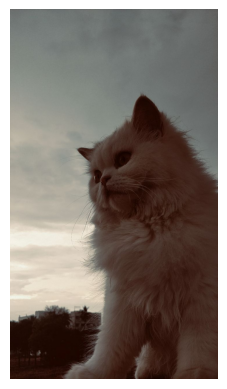

In [4]:
# Load and preprocess the image you want to predict and visualize
image_path = r"C:\Users\SsDsS\Desktop\WhatsApp Image 2023-10-22 at 20.08.05_b1354dab.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = resize(image, (64, 64))  # Resize the image to a consistent size
feature = hog(image, **hog_params)
feature = np.array(feature).reshape(1, -1)  # Reshape the feature vector

# Load the pre-trained SVM model
svm_model = joblib.load("svm_model.pkl")

# Make predictions
prediction = svm_model.predict(feature)

# Interpret the prediction
if prediction == 0:
    print("It's a cat!")
else:
    print("It's a dog!")

# Visualize the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


It's a dog!


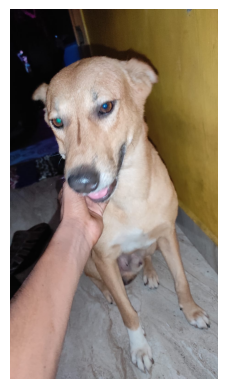

In [5]:
# Load and preprocess the image you want to predict and visualize
image_path = r"C:\Users\SsDsS\Desktop\WhatsApp Image 2023-10-22 at 20.10.54_64378d13.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = resize(image, (64, 64))  # Resize the image to a consistent size
feature = hog(image, **hog_params)
feature = np.array(feature).reshape(1, -1)  # Reshape the feature vector

# Load the pre-trained SVM model
svm_model = joblib.load("svm_model.pkl")

# Make predictions
prediction = svm_model.predict(feature)

# Interpret the prediction
if prediction == 0:
    print("It's a cat!")
else:
    print("It's a dog!")

# Visualize the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


It's a cat!


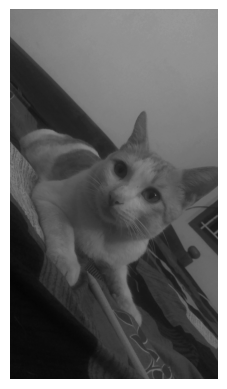

In [6]:
# Load and preprocess the image you want to predict and visualize
image_path = r"C:\Users\SsDsS\Desktop\WhatsApp Image 2023-10-22 at 20.16.03_036dbc29.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = resize(image, (64, 64))  # Resize the image to a consistent size
feature = hog(image, **hog_params)
feature = np.array(feature).reshape(1, -1)  # Reshape the feature vector

# Load the pre-trained SVM model
svm_model = joblib.load("svm_model.pkl")

# Make predictions
prediction = svm_model.predict(feature)

# Interpret the prediction
if prediction == 0:
    print("It's a cat!")
else:
    print("It's a dog!")

# Visualize the image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()
